In [6]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = 'news images/train_set'
validation_dir = 'news images/test_set'
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=15, width_shift_range=0.2, height_shift_range=0.4, shear_range=0.2, zoom_range=0.3, horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(IMG_SIZE, IMG_SIZE), batch_size=BATCH_SIZE, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(IMG_SIZE, IMG_SIZE), batch_size=BATCH_SIZE, class_mode='binary')
from keras import layers
from keras import models
from tensorflow import keras
from keras import optimizers
 
keras.backend.clear_session()

Found 706 images belonging to 2 classes.
Found 176 images belonging to 2 classes.


In [7]:
total_train = train_generator.n
total_test = validation_generator.n

In [1]:
import os
import cv2
IMG_SIZE = 250
DIRECTORY = "Fake-News-Image-Detector-1"
CATEGORIES = ["fake", "real"]
IMG_SIZE = 250
sets = ['train', 'test', 'valid']
train_set = []
test_set = []
valid_set = []

for category in CATEGORIES:
    for set in sets:
        datasets = os.path.join(DIRECTORY, set, category)
        label = CATEGORIES.index(category)
        for img in os.listdir(datasets):
            img_path = os.path.join(datasets, img)
            img_arr = cv2.imread(img_path)
            #img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
            img_arr = cv2.resize(img_arr,(IMG_SIZE, IMG_SIZE))
            if set == 'train':
                train_set.append([img_arr, label])
            if set == 'test':
                test_set.append([img_arr, label])
            if set == 'valid':
                valid_set.append([img_arr, label])
import numpy as np
X_train = np.array([arr[0] for arr in train_set])/255
y_train = np.array([arr[1] for arr in train_set])

X_test = np.array([arr[0] for arr in test_set])/255
y_test = np.array([arr[1] for arr in test_set])

X_valid = np.array([arr[0] for arr in valid_set])/255
y_valid = np.array([arr[1] for arr in valid_set])

In [2]:
import tensorflow as tf
base_model = tf.keras.applications.ResNet152V2(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights="imagenet")

In [3]:
for layer in base_model.layers:
  layer.trainable = False

In [4]:
import tensorflow as tf
last_output = base_model.output
x = tf.keras.layers.GlobalMaxPooling2D()(last_output)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(base_model.input, x)
opt = tf.keras.optimizers.Adam(lr=1e-3)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['acc'])

c:\Users\cvaal\anaconda3\envs\tf-gpu-2.12\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [5]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 250, 250, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 256, 256, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 125, 125, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [6]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=True,
                    validation_data=(X_valid, y_valid),
                    batch_size=32)

Epoch 1/50
85/85 [==============================] - 52s 461ms/step - loss: 1.4265 - acc: 0.6797 - val_loss: 0.5005 - val_acc: 0.7626
Epoch 2/50
85/85 [==============================] - 34s 402ms/step - loss: 0.3845 - acc: 0.8294 - val_loss: 0.3601 - val_acc: 0.8444
Epoch 3/50
85/85 [==============================] - 34s 403ms/step - loss: 0.2909 - acc: 0.8707 - val_loss: 0.3776 - val_acc: 0.8249
Epoch 4/50
85/85 [==============================] - 34s 403ms/step - loss: 0.2372 - acc: 0.9038 - val_loss: 0.4086 - val_acc: 0.8482
Epoch 5/50
85/85 [==============================] - 34s 404ms/step - loss: 0.1937 - acc: 0.9268 - val_loss: 0.4926 - val_acc: 0.8482
Epoch 6/50
85/85 [==============================] - 34s 403ms/step - loss: 0.1585 - acc: 0.9342 - val_loss: 0.4193 - val_acc: 0.8755
Epoch 7/50
85/85 [==============================] - 34s 402ms/step - loss: 0.1372 - acc: 0.9454 - val_loss: 0.4662 - val_acc: 0.8521
Epoch 8/50
85/85 [==============================] - 35s 413ms/step - 

In [9]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 2s 288ms/step - loss: 0.8798 - acc: 0.7829


[0.879764199256897, 0.7829457521438599]

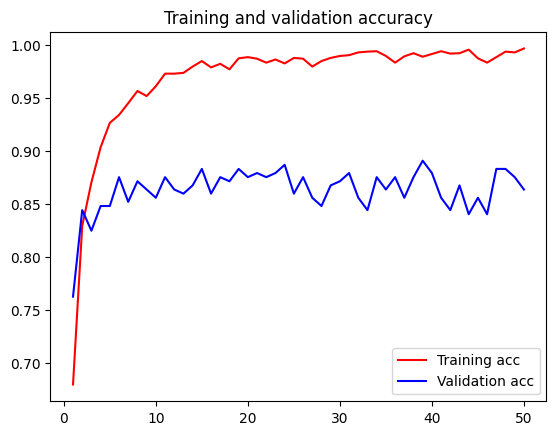

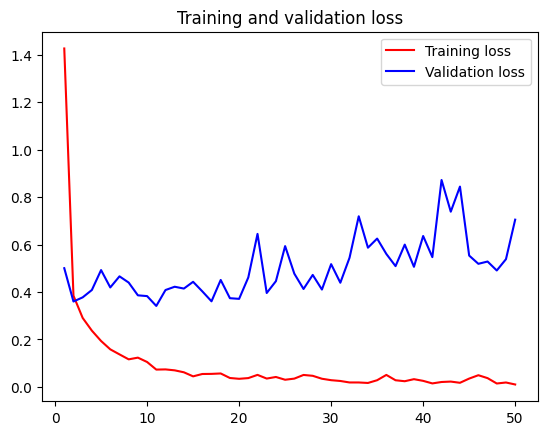

In [7]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [10]:
model_json = model.to_json()
with open("classification models/resnet152/RESNET_Skin_Classifier.json", "w") as json_file:
    json_file.write(model_json)

model.save("classification models/resnet152/RESNET_Skin_Classifier.h5")
print("Saved model to disk")
model.save_weights("classification models/resnet152/RESNET_Skin.h5")

Saved model to disk


In [8]:
result = model.evaluate(validation_generator,batch_size=BATCH_SIZE)
print("test_loss, test accuracy",result)

#model.load_weights(bst_model_path)
loss, accuracy = model.evaluate(train_generator,batch_size=BATCH_SIZE)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(validation_generator,batch_size=BATCH_SIZE)
print("Testing Accuracy:  {:.4f}".format(accuracy))


NameError: name 'validation_generator' is not defined

94781440/94765736 [==============================] - 18s 0us/step
Epoch 1/100
22/22 [==============================] - 20s 780ms/step - loss: 1.0661 - acc: 0.4659 - val_loss: 0.6361 - val_acc: 0.6625
Epoch 2/100
22/22 [==============================] - 17s 745ms/step - loss: 0.8021 - acc: 0.5549 - val_loss: 0.5630 - val_acc: 0.7125
Epoch 3/100
22/22 [==============================] - 16s 714ms/step - loss: 0.7491 - acc: 0.5727 - val_loss: 0.5846 - val_acc: 0.6562
Epoch 4/100
22/22 [==============================] - 16s 702ms/step - loss: 0.7161 - acc: 0.6024 - val_loss: 0.5464 - val_acc: 0.6687
Epoch 5/100
22/22 [==============================] - 16s 703ms/step - loss: 0.6778 - acc: 0.6291 - val_loss: 0.5004 - val_acc: 0.8062
Epoch 6/100
22/22 [==============================] - 16s 700ms/step - loss: 0.6413 - acc: 0.6602 - val_loss: 0.4813 - val_acc: 0.7937
Epoch 7/100
22/22 [==============================] - 16s 699ms/step - loss: 0.6361 - acc: 0.6558 - val_loss: 0.4826 - val_acc: 0.7

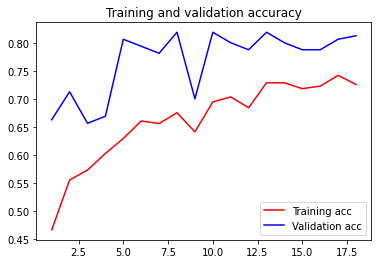

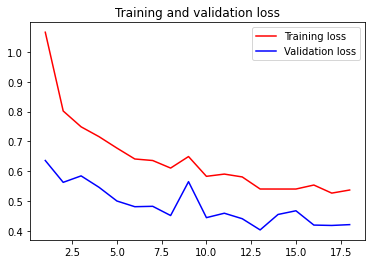

In [5]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

base_model = keras.applications.ResNet50(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights="imagenet")
for layer in base_model.layers:
  layer.trainable = False
import tensorflow as tf
last_output = base_model.output
x = tf.keras.layers.GlobalMaxPooling2D()(last_output)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)

x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(base_model.input, x)
opt = tf.keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['acc'])


STAMP = f'RESNET152_MODEL'
early_stopping =EarlyStopping(monitor='val_loss', patience=5)
bst_model_path = STAMP + '.h5'
model_checkpoint = ModelCheckpoint(bst_model_path, save_best_only=True, save_weights_only=True)
history = model.fit(train_generator,
steps_per_epoch=(total_train//BATCH_SIZE),
epochs = 100,
validation_data=validation_generator,
validation_steps=(total_test//BATCH_SIZE),
batch_size = BATCH_SIZE,
verbose = 1, callbacks=[early_stopping, model_checkpoint])

model.load_weights(bst_model_path)
result = model.evaluate(validation_generator,batch_size=BATCH_SIZE)
print("test_loss, test accuracy",result)

#model.load_weights(bst_model_path)
loss, accuracy = model.evaluate(train_generator,batch_size=BATCH_SIZE)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(validation_generator,batch_size=BATCH_SIZE)
print("Testing Accuracy:  {:.4f}".format(accuracy))

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [10]:
model_json = model.to_json()
with open("classification models/resnet152/RESNET_Skin_Classifier.json", "w") as json_file:
    json_file.write(model_json)

model.save("classification models/resnet152/RESNET_Skin_Classifier.h5")
print("Saved model to disk")
model.save_weights("classification models/resnet152/RESNET_Skin.h5")

Saved model to disk


29097984/29084464 [==============================] - 8s 0us/step
Epoch 1/100
21/21 [==============================] - 25s 864ms/step - loss: 1.5267 - acc: 0.4814 - val_loss: 0.7488 - val_acc: 0.5375
Epoch 2/100
21/21 [==============================] - 16s 750ms/step - loss: 1.1934 - acc: 0.5946 - val_loss: 0.7053 - val_acc: 0.6438
Epoch 3/100
21/21 [==============================] - 16s 755ms/step - loss: 0.9765 - acc: 0.6200 - val_loss: 0.5934 - val_acc: 0.6938
Epoch 4/100
21/21 [==============================] - 16s 753ms/step - loss: 0.9029 - acc: 0.6632 - val_loss: 0.5537 - val_acc: 0.7063
Epoch 5/100
21/21 [==============================] - 15s 728ms/step - loss: 0.7449 - acc: 0.6930 - val_loss: 0.5774 - val_acc: 0.7250
Epoch 6/100
21/21 [==============================] - 16s 764ms/step - loss: 0.7562 - acc: 0.6870 - val_loss: 0.5398 - val_acc: 0.7750
Epoch 7/100
21/21 [==============================] - 15s 720ms/step - loss: 0.6727 - acc: 0.7377 - val_loss: 0.5414 - val_acc: 0.75

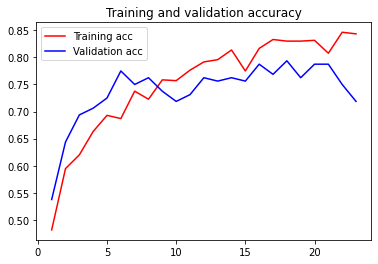

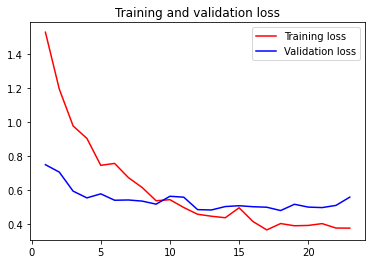

In [10]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

base_model = keras.applications.DenseNet121(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights="imagenet")
for layer in base_model.layers:
  layer.trainable = False
import tensorflow as tf
last_output = base_model.output
x = tf.keras.layers.GlobalMaxPooling2D()(last_output)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(base_model.input, x)
opt = tf.keras.optimizers.Nadam(lr=1e-4)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['acc'])


STAMP = f'DENSENET_MODEL'
early_stopping =EarlyStopping(monitor='val_loss', patience=5)
bst_model_path = STAMP + '.h5'
model_checkpoint = ModelCheckpoint(bst_model_path, save_best_only=True, save_weights_only=True)
history = model.fit(train_generator,
steps_per_epoch=(703//BATCH_SIZE),
epochs = 100,
validation_data=validation_generator,
validation_steps=(175//BATCH_SIZE),
batch_size = BATCH_SIZE,
verbose = 1, callbacks=[early_stopping, model_checkpoint])

model.load_weights(bst_model_path)
result = model.evaluate(validation_generator,batch_size=BATCH_SIZE)
print("test_loss, test accuracy",result)

#model.load_weights(bst_model_path)
loss, accuracy = model.evaluate(train_generator,batch_size=BATCH_SIZE)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(validation_generator,batch_size=BATCH_SIZE)
print("Testing Accuracy:  {:.4f}".format(accuracy))

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Epoch 1/100
21/21 [==============================] - 22s 878ms/step - loss: 1.2414 - acc: 0.5723 - val_loss: 0.7078 - val_acc: 0.7125
Epoch 2/100
21/21 [==============================] - 16s 766ms/step - loss: 1.0515 - acc: 0.6185 - val_loss: 0.6547 - val_acc: 0.7063
Epoch 3/100
21/21 [==============================] - 16s 760ms/step - loss: 0.9093 - acc: 0.6483 - val_loss: 0.6214 - val_acc: 0.6375
Epoch 4/100
21/21 [==============================] - 15s 729ms/step - loss: 0.7806 - acc: 0.6975 - val_loss: 0.7391 - val_acc: 0.6625
Epoch 5/100
21/21 [==============================] - 15s 730ms/step - loss: 0.6238 - acc: 0.7183 - val_loss: 0.7046 - val_acc: 0.6250
Epoch 6/100
21/21 [==============================] - 16s 788ms/step - loss: 0.5542 - acc: 0.7615 - val_loss: 0.7420 - val_acc: 0.6625
Epoch 7/100
21/21 [==============================] - 17s 798ms/step - loss: 0.5620 - acc: 0.7466 - val_loss: 0.6762 - val_acc: 0.6187
Epoch 8/100
6/6 [==============================] - 3s 490ms/st

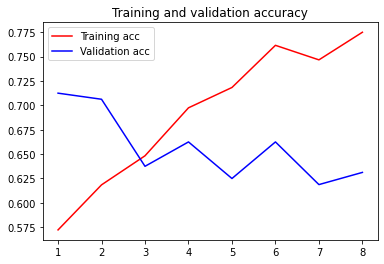

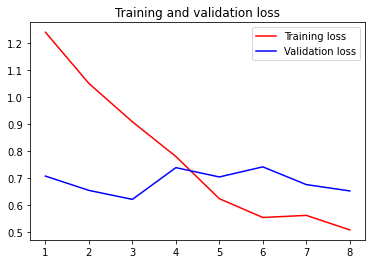

In [12]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

base_model = keras.applications.InceptionV3(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights="imagenet")
for layer in base_model.layers:
  layer.trainable = False
import tensorflow as tf
last_output = base_model.output
x = tf.keras.layers.GlobalMaxPooling2D()(last_output)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(base_model.input, x)
opt = tf.keras.optimizers.Nadam(lr=1e-4)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['acc'])


STAMP = f'INCEPTIONV3_MODEL'
early_stopping =EarlyStopping(monitor='val_loss', patience=5)
bst_model_path = STAMP + '.h5'
model_checkpoint = ModelCheckpoint(bst_model_path, save_best_only=True, save_weights_only=True)
history = model.fit(train_generator,
steps_per_epoch=(703//BATCH_SIZE),
epochs = 100,
validation_data=validation_generator,
validation_steps=(175//BATCH_SIZE),
batch_size = BATCH_SIZE,
verbose = 1, callbacks=[early_stopping, model_checkpoint])

model.load_weights(bst_model_path)
result = model.evaluate(validation_generator,batch_size=BATCH_SIZE)
print("test_loss, test accuracy",result)

#model.load_weights(bst_model_path)
loss, accuracy = model.evaluate(train_generator,batch_size=BATCH_SIZE)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(validation_generator,batch_size=BATCH_SIZE)
print("Testing Accuracy:  {:.4f}".format(accuracy))

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [17]:
keras.backend.clear_session()

In [18]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

base_model = keras.applications.ResNet50V2(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights="imagenet")
for layer in base_model.layers:
  layer.trainable = False
import tensorflow as tf
last_output = base_model.output
x = tf.keras.layers.GlobalMaxPooling2D()(last_output)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(base_model.input, x)
opt = tf.keras.optimizers.Nadam(lr=1e-4)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['acc'])


STAMP = f'RESNET50V2_MODEL'
early_stopping =EarlyStopping(monitor='val_loss', patience=10)
bst_model_path = STAMP + '.h5'
model_checkpoint = ModelCheckpoint(bst_model_path, save_best_only=True, save_weights_only=True)
history = model.fit(train_generator,
steps_per_epoch=(703//BATCH_SIZE),
epochs = 100,
validation_data=validation_generator,
validation_steps=(175//BATCH_SIZE),
batch_size = BATCH_SIZE,
verbose = 1, callbacks=[early_stopping, model_checkpoint])

model.load_weights(bst_model_path)
result = model.evaluate(validation_generator,batch_size=BATCH_SIZE)
print("test_loss, test accuracy",result)

#model.load_weights(bst_model_path)
loss, accuracy = model.evaluate(train_generator,batch_size=BATCH_SIZE)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(validation_generator,batch_size=BATCH_SIZE)
print("Testing Accuracy:  {:.4f}".format(accuracy))

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Epoch 1/100
21/21 [==============================] - 20s 832ms/step - loss: 3.2282 - acc: 0.5201 - val_loss: 1.3552 - val_acc: 0.6062
Epoch 2/100
21/21 [==============================] - 16s 759ms/step - loss: 1.9723 - acc: 0.6438 - val_loss: 1.3930 - val_acc: 0.6125
Epoch 3/100
21/21 [==============================] - 17s 787ms/step - loss: 1.5590 - acc: 0.6915 - val_loss: 1.2819 - val_acc: 0.7125
Epoch 4/100
21/21 [==============================] - 16s 769ms/step - loss: 1.1801 - acc: 0.7273 - val_loss: 1.2056 - val_acc: 0.6938
Epoch 5/100
21/21 [==============================] - 16s 743ms/step - loss: 1.1217 - acc: 0.7496 - val_loss: 1.1995 - val_acc: 0.7312
Epoch 6/100
21/21 [==============================] - 15s 721ms/step - loss: 1.0779 - acc: 0.7496 - val_loss: 1.2040 - val_acc: 0.7250
Epoch 7/100
21/21 [==============================] - 16s 772ms/step - loss: 0.8304 - acc: 0.7869 - val_loss: 1.1460 - val_acc: 0.7188
Epoch 8/100
21/21 [==============================] - 16s 739ms

KeyboardInterrupt: 

In [ ]:
import pathlib
temp = pathlib.PosixPath
pathlib.PosixPath = pathlib.WindowsPath
# import torch
# model = torch.hub.load('ultralytics/yolov5', 'custom', 'runs/train-cls/exp5/weights/best.pt', force_reload=True)

main = 'yolov5'
directory = "news images"
sets = 'test_set'
rate = 'fake'
img = '53245260_1279709585537938_6338666581165342720_n.jpg'
import os
path = os.path.join(directory, sets, rate)
img_path = os.path.join(path, img)
!python classify/predict.py --weights runs/train-cls/exp5/weights/best.pt --source img_path